In [2]:
%load_ext autoreload
%autoreload 2
import os
import GCRCatalogs
import time
import matplotlib.pyplot as plt
import pickle
import sys
#import clmm
#i#mport clmm.dataops as da
import glob
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import sys
import photoz_utils as utils
import see_cl as see
from astropy.table import Table
def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)
    from clmm.dataops import compute_galaxy_weights
from clmm import Cosmology
from scipy.integrate import simps
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'compute_critical_surface_density' from 'clmm.theory' (/pbs/home/c/cpayerne/.conda/envs/myenv/lib/python3.10/site-packages/clmm-1.7.3-py3.10.egg/clmm/theory/__init__.py)

In [ ]:
cosmo.eval_sigma_crit

In [ ]:
def delete_file(list_filename):
     for f in list_filename:
        os.remove(f)

In [4]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit

In [5]:
file = glob.glob('/sps/lsst/users/cpayerne/CLMassDC2/cosmoDC2/redmapper_clusters/l*')
#file = glob.glob('./job/lensing*')
lens_cat = edit.load_pickle('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/lens_catalog_cosmoDC2_v1.1.4_redmapper_v0.8.1.pkl')

In [6]:
#file 

In [7]:
len(file)

5856

In [8]:
len(file)

5856

In [9]:
file[0]

'/sps/lsst/users/cpayerne/CLMassDC2/cosmoDC2/redmapper_clusters/lensing_catalog_halo_4835.pkl'

In [10]:
cluster_id_saved = []
for f in file:
   # cluster_id_saved.append(int(f.split('.pkl')[0].split('halo_')[1]))
    cluster_id_saved.append(f.split('halo_')[1])

In [11]:
len(cluster_id_saved)

5856

# Check extraction

In [12]:
lens_cat = edit.load_pickle('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/lens_catalog_cosmoDC2_v1.1.4_redmapper_v0.8.1.pkl')

In [91]:
index = 20#int(np.random.random()*4000)
cltest = edit.load_pickle(file[index])
cluster_id = int(file[index].split('.pkl')[0].split('halo_')[1])
lens = lens_cat[lens_cat['cluster_id'] == cluster_id][0]
ra, dec, z = lens['ra'], lens['dec'], lens['redshift']

In [92]:
len(cltest)

64986

In [93]:
cltest

ra,dec,z,galaxy_id,mag_i,mag_r,mag_y,shear1,shear2,kappa,e1_true,e2_true,g1,g2,e1,e2,sigma_c_photoz_bpz,p_background_bpz,photoz_err_bpz,sigma_c_photoz_estimate_0_bpz,sigma_c_photoz_estimate_1_bpz,sigma_c_photoz_estimate_2_bpz,z_estimate_0_bpz,z_estimate_1_bpz,z_estimate_2_bpz,photoz_mean_bpz,photoz_mode_bpz,photoz_odds_bpz,sigma_c_photoz_flex,p_background_flex,photoz_err_flex,sigma_c_photoz_estimate_0_flex,sigma_c_photoz_estimate_1_flex,sigma_c_photoz_estimate_2_flex,z_estimate_0_flex,z_estimate_1_flex,z_estimate_2_flex,photoz_mean_flex,photoz_mode_flex,photoz_odds_flex
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
55.26979434900593,-33.79580509483675,0.49925901227045455,4937875283.0,22.080711354046453,22.927488316326727,21.49022864225446,0.002521280079821331,0.004099524090850477,0.008780537994936832,0.11360324456510831,0.01459031018836425,0.0025436143825517945,0.0041358389821744,0.11609818283505108,0.018769832224180227,1.514515555377893e+16,0.96363217587082,0.024230375997494908,8035803395622060.0,1.184134349091683e+16,1.2638156842303644e+16,0.539458188146783,0.49907984198206934,0.49416191049991265,0.48859065771102905,0.48500001430511475,1.0,1.163919455584352e+16,1.0000000000000002,0.019345218014314387,1.4930456162733686e+16,1.198836797792806e+16,1.260621423740005e+16,0.48330085016064833,0.4981154497694481,0.49434531481927957,0.5013915300369263,0.5,0.8699558973312378
55.27149010318658,-33.79538683838469,0.49898541183394096,4937875284.0,23.558305383179928,24.061353326295162,23.252668023560787,0.0018155030522173377,0.0040071940066264845,0.008648530812182198,0.09486080400515205,-0.03242931259777356,0.001831341465307678,0.004042152688702271,0.096700573539594,-0.02834312939491449,1.2125312884923882e+16,0.9139859528146705,0.03978735444480273,8726913271735880.0,3.603584034219051e+16,9738701916607312.0,0.5289040465441626,0.4513110937053347,0.5167006684779539,0.5037825107574463,0.5149999856948853,0.9273677468299866,1.0420236671993014e+16,1.0,0.020847100134687692,9431116202894586.0,1.378324200969768e+16,1.4800717333665186e+16,0.5200753227415281,0.4882241088666397,0.48381460289810396,0.5113378167152405,0.5099999904632568,0.9670018553733826
55.064057978719845,-33.881344436052586,0.49782346181519754,4937875724.0,22.142179789103874,23.00557929471911,21.54557067350329,-0.003395236268959101,-0.00025013303802763273,0.004569492881657977,0.17359581808433697,0.06889576001769311,-0.003410821995789463,-0.0002512812659838399,0.17027561415252326,0.06871894282920792,1.26801393620151e+16,0.9865727271168652,0.02500568555203893,1.486453438141563e+16,1.4446246882099274e+16,1.5709401674196252e+16,0.4835606349627739,0.48527130796856344,0.4804154088932276,0.500187337398529,0.5049999952316284,0.9982495307922363,1.0797082768285768e+16,1.0,0.01891372262680882,8038028782113965.0,1.3654538441904778e+16,1.115657274249221e+16,0.5394205451412769,0.4888350666689937,0.5039638416332336,0.5072619915008545,0.5099999904632568,0.9605368375778198
55.20205281764283,-33.858011692924094,0.4866004640544084,4937875911.0,22.308300565848317,23.00487573064324,21.763302396903004,-0.00587059476909918,0.00639496690607579,0.012673507293960329,0.0765562639233116,0.012023477825896252,-0.005945950820188367,0.006477053895868453,0.07062643910576558,0.01854760007323315,8971006668687792.0,1.0,0.023787489926051637,1.1789581803806864e+16,7644987533496271.0,9420174240738072.0,0.4994260119431233,0.5465014647750962,0.5202002845993449,0.5317061543464661,0.5350000262260437,1.0,1.129690306067853e+16,0.9999999999999999,0.02796243099377707,1.280471673158261e+16,9157227846007370.0,7853857542488053.0,0.4932225703635024,0.5233126384405882,0.5426270318556216,0.5045251250267029,0.5,0.6747733950614929
54.86628514494568,-34.209972632282735,

In [113]:
z_bins = np.linspace(min(cltest['z']), max(cltest['z']), 16)
z_center = np.array([np.mean([z_bins[i], z_bins[i+1]]) for i in range(len(z_bins)-1)])
z_mean_BPZ = []
z_mean_BPZ_err = []
z_mean_BPZ_odds = []
z_mean_BPZ_err_odds = []
z_mean_Flex = []
z_mean_Flex_err = []
for i in range(len(z_center)):
    mask_z = (cltest['z'] > z_bins[i])*(cltest['z'] < z_bins[i+1])
    cat_cut = cltest[mask_z]
    z_mean_Flex.append(np.mean(cat_cut['photoz_mean_flex']))
    z_mean_Flex_err.append(np.std(cat_cut['photoz_mean_flex']))
    
    z_mean_BPZ.append(np.mean(cat_cut['photoz_mean_bpz']))
    z_mean_BPZ_err.append(np.std(cat_cut['photoz_mean_bpz']))
    
    mask_odds = cat_cut['photoz_odds_bpz'] > .8
    z_mean_BPZ_odds.append(np.mean(cat_cut['photoz_mean_bpz'][mask_odds]))
    z_mean_BPZ_err_odds.append(np.std(cat_cut['photoz_mean_bpz'][mask_odds]))
    #plt.scatter(z_center[i], np.mean(cat_cut['photoz_mean_flex']))

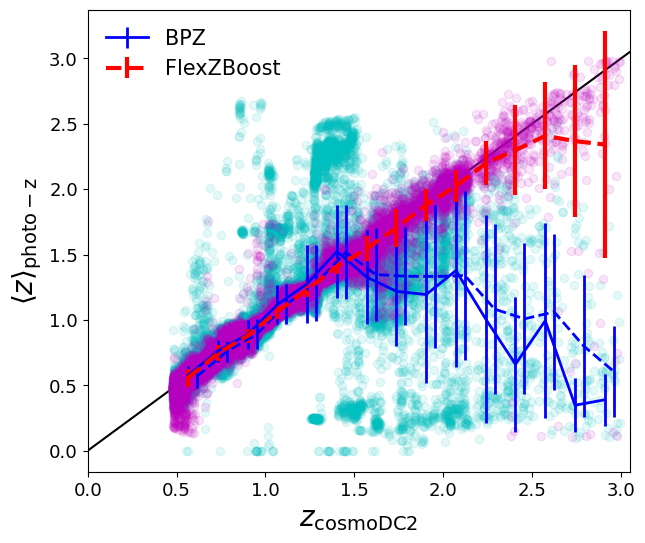

In [123]:
plt.figure(figsize=(7,6))
plt.scatter(cltest['z'], cltest['photoz_mean_bpz'], alpha=.1, c='c')
plt.scatter(cltest['z'], cltest['photoz_mean_flex'], alpha=.1, c='m')
#
#

plt.errorbar(z_center+.05, z_mean_BPZ, z_mean_BPZ_err, fmt='--b', linewidth=2)
plt.errorbar(z_center, z_mean_BPZ_odds, z_mean_BPZ_err_odds, fmt='-b', linewidth=2, label = 'BPZ')
#plt.axis('equal')

plt.errorbar(z_center, z_mean_Flex, z_mean_Flex_err, fmt='--r', linewidth=3, label = 'FlexZBoost')
plt.plot(np.linspace(0, 3.05 ,10),np.linspace(0, 3.05, 10), '-k', zorder=0)
plt.xlim(0, 3.05)
plt.tick_params(axis='both', which = 'major', labelsize= 13)
plt.xlabel(r'$z_{\rm cosmoDC2}$', fontsize=20)
plt.ylabel(r'$\langle z \rangle_{\rm photo-z}$', fontsize=20)
plt.legend(fontsize=15, frameon=False)
plt.savefig('mean_photometric_redshift', bbox_inches='tight', dpi=300)

# Check missing extraction

In [433]:
lens_cat_to_extract = lens_cat[(lens_cat['richness'] > 20)*(lens_cat['redshift'] > .2)]
print(len(lens_cat_to_extract))

4240


In [434]:
mask = np.isin(lens_cat_to_extract['cluster_id'], cluster_id_saved)

In [435]:
lens_cat_miss = lens_cat_to_extract[np.invert(mask)]
print(len(lens_cat_miss))

1475


In [438]:
index = np.arange(len(lens_cat_to_extract['ra']))

In [440]:
index_mask = index[np.invert(mask)]

In [441]:
index_mask 

array([   0,    2,    3, ..., 4237, 4238, 4239])

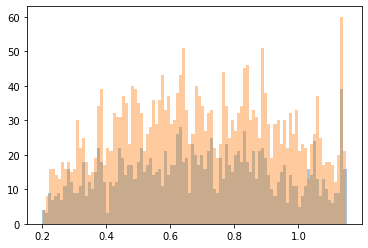

In [409]:
plt.hist(lens_cat_to_extract[np.invert(mask)]['redshift'], alpha=.4, bins=100)
plt.hist(lens_cat_to_extract[mask]['redshift'], alpha=.4, bins=100)
plt.show()